## 19.05.2023 Logistic Regression

Copyright (C) 2023, B. Zeller-Plumhoff

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the [GNU General Public License](https://www.gnu.org/licenses/gpl-3.0.html) for more details.

This Jupyter Notebook was created by Berit Zeller-Plumhoff for the course "Data Science for Material Scientists" at Kiel University. 

Within the notebook, you will plot a sigmoid function trialling different parameters. You will then use logistic regression to attempt a simplistic prediction of tumour malignance based on one morphological feature of the tumour. Finally, you will perform a logistic regression to classify metallic and non-metallic materials based on their composition.

We begin by loading the required libraries. Note that in addition to the libraries you have gotten to know until now, we make use of [matminer](https://hackingmaterials.lbl.gov/matminer/#) and [pymatgen](https://pymatgen.org/). Have a closer look at the respective websites to learn more about these. 

The publication from [Ward et al., 2018](https://www.sciencedirect.com/science/article/abs/pii/S0927025618303252)<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) gives further information on Matminer. The toolkit accesses external databases, such as the [Materials Project](https://materialsproject.org/), where a large number of materials data has been accumulated and published.

In [18]:
import pandas as pd # library for organizing data
import numpy as np # library for numerial computations
from sklearn import linear_model # the linear_model library establishes a straightforward implementation of a linear regression model
from sklearn.metrics import log_loss, accuracy_score # these libraries enable the calculation of the MSE, MAE and R2 goodness of fit
from sklearn.model_selection import train_test_split # this library enables the splitting of a data set into training and test data
from sklearn.datasets import load_breast_cancer # access a medical dataset of breast cancer malignancy given morphological features
from sklearn.inspection import DecisionBoundaryDisplay # library to display decision boundaries of classifiers

import matplotlib.pyplot as plt # library for plotting (not interactive)
import matminer.datasets as mm # library for data mining materials properties, accesses published datasets
from matminer.featurizers.conversions import StrToComposition # converts a string denoting a material composition into the composition
from matminer.featurizers.composition.element import ElementFraction # determines the element fraction for a given composition
from pymatgen.core import Composition # materials analysis library, module used to analyse the chemical composition of a compound

#### Logistic regression function

We will begin by gaining some practical understanding on the sigmoid function used in logistic regression. To start with, define a function that takes both the (1D) feature vector $x$ and the array $\theta$ (containing the intercept $\theta_0$ and slope $\theta_1$) as input and returns the values of the sigmoid function for all given $x$.

In [19]:
def log_reg_func(x,theta):
    
    # determine the value of the sigmoid function
    s=1/(1+np.exp(-theta[0]-theta[1]*x))
    
    #return the result
    return s

Based on the function you have defined, make a figure with two subplots (arranged vertically), where in the first subplot, you vary $\theta_0 \in \{-4,0,4\}$, while $\theta_1=1$ and in the second subplot you vary $\theta_1 \in \{-4,0.5,1,4\}$, while $\theta_0=0$. $x \in \left[-10,10\right]$ with $\Delta x = 0.1$. Make sure that you are including a legend in each plot. Let both plots share the x-axis, so that tick and the axis label only need to be included in the lower plot.

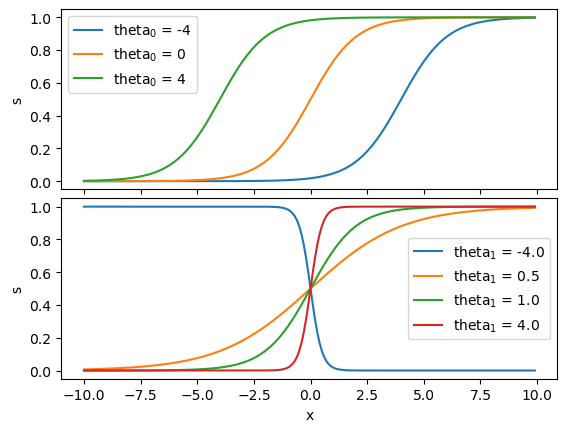

In [22]:
# set x
x=np.arange(-10,10,0.1)
# initialize the subplots
fig, axs = plt.subplots(2,1, sharex=True)
# adjust the vertical spacing between the plots to minimize it
plt.subplots_adjust(hspace=0.05)
# plot the function for varying theta_0 in the upper graph
for i in [-4,0,4]:
    theta=np.array([i,1])
    s=log_reg_func(x,theta)
    axs[0].plot(x,s,label='theta$_0$ = %d'%i)
    axs[0].set_ylabel('s')
    axs[0].legend()
# plot the function for varying theta_1 in the lower graph
for i in [-4,0.5,1,4]:
    theta=np.array([0,i])
    s=log_reg_func(x,theta)
    axs[1].plot(x,s,label='theta$_1$ = %0.1f'%i)
    axs[1].set_ylabel('s')
    axs[1].legend()
plt.xlabel('x')
# show the plot
plt.show()

### Logistic regression

While we have an understanding of what how $\theta$ will influence the shape of the logistic regression function, we now what to actually employ it for classification. Define a classification function that makes use of _scikit_learn_ to perform classification using logistic regression given an input feature vector and observation vector for training. The function should output the predicted labels/classes for the training features, as well as the fitted classifier.

In [5]:
def classification(X_train, Y_train):
    
    # Define the model using linear_model and LogisticRegression from Scikit_learn
    model = linear_model.LogisticRegression()
    # train the model using .fit
    model.fit(X_train, Y_train)
        
    # Use the model to predict the entire set of data using .predict
    predictions = model.predict(X_train) 
    
    # return the predictions and the fitted model
    return predictions, model

We want to apply this classier to the [Breast Cancer Wisconsin Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), which is available in _scikit_learn_. Start by loading and displaying the dataset.

In [6]:
# load the breast cancer dataset into a variable
cancer = load_breast_cancer()
# display that variable to attain a better understanding of its structure
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Without specifing any parameters when loading the dataset, you have loaded a bunch object. You should convert it into a pandas data frame. Display the data frame to have a look at the different features. Note that a target of 1 means that the tumour is benign, while a target of 0 means that it is malignant.

In [7]:
# convert the data part of the cancer bunch object to a dataframe
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# add a target column to the dataframe to which you assign the target of the cancer bunch object
cancer_df['target'] = pd.Series(cancer.target)
# display the dataframe
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


As you can see, within this data set we have 30 features that can be used to predict the cancer malignancy. In this instance, we will not use all features simultaneously, but you should test for each feature whether it alone could be used to predict the tumour malignancy with little error. Save all trained models in a list for later access. Display the log loss testing error for each feature.

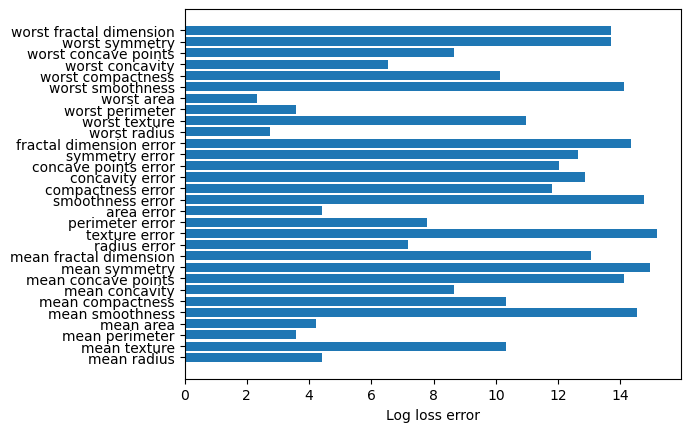

In [8]:
# assign the target column of the data frame to your observation variable y
y=cancer_df['target']
# initialize empty lists for the log loss and the different models for each feeature
log_loss_cancer=[]
model_cancer=[]
# perform training the classifier for each feature
for i in cancer_df.columns[0:-1]:
    # assign the feature vector for training
    X=np.array(cancer_df[i]).reshape(-1, 1)
    # split the data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    # perform regression and prediction for training and predict y for the testing data
    pred_train, model = classification(X_train, y_train)
    pred_test=model.predict(X_test)
    # add the model and error to the respective lists
    model_cancer.append(model)
    log_loss_cancer.append(log_loss(y_test, pred_test))

# plot the error for each feature in a horizontal bar chart
plt.barh(y=np.arange(0,np.size(log_loss_cancer)),width=log_loss_cancer)
plt.yticks(ticks=np.arange(0,np.size(log_loss_cancer)),labels=cancer_df.columns[0:-1])
plt.xlabel('Log loss error')
plt.show() 

You can see how the use of different features for the classification of the cancer might lead to very different results. Perform a classification with the best performing feature and plot the classification probability for the features (selecting only every 5th data point), highlighting the observed class by color of the marker. In addition to the scatter plot, plot the underlying probability function and indicate the probability treshold by a horizontal line. Include a legend.

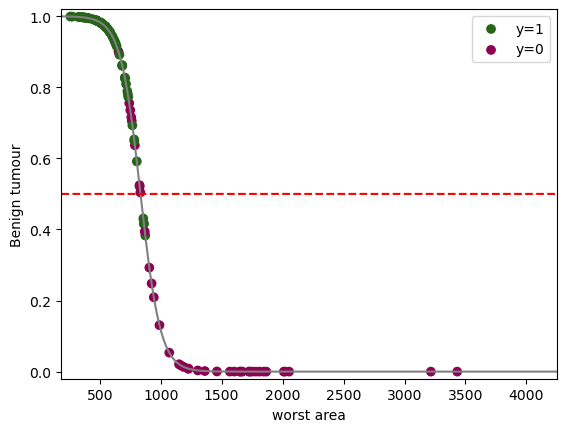

In [9]:
# identify the column index for which the log loss error is minimal
min_idx=np.where(log_loss_cancer==np.min(log_loss_cancer))[0][0]
# initialize the figure
fig=plt.subplots()
# plot every 5th entry of the feature vector and the predicted probability determined by the classifer
# each scatter marker should be assined the correct class in colour
plt.scatter(x=cancer_df.iloc[0:-1:5,min_idx],
            y=model_cancer[min_idx].predict_proba(np.array(cancer_df.iloc[0:-1:5,min_idx]).reshape(-1,1))[:,1],
            c=cancer_df['target'][0:-1:5],cmap='PiYG')
# set up an array in the overall range of the feature vector with minimal log loss error and even step size
X=np.arange(np.min(cancer_df.iloc[:,min_idx]),np.max(cancer_df.iloc[:,min_idx]),0.25).reshape(-1, 1)
# plot the underlying probability function with the vector you have just defined
plt.plot(X,model_cancer[min_idx].predict_proba(X)[:,1],color='gray')
# plot the horizontal threshold line
plt.plot(X,np.ones_like(X)*0.5,color='red',linestyle='dashed')
# prepare your legend
h1=plt.scatter(x=[-1,-1],y=[-1,-1],c=[0,0],cmap='PiYG')
h2=plt.scatter(x=[-1,-1],y=[-1,-1],c=[1,0],cmap='PiYG')
plt.legend([h2,h1],['y=1','y=0'])
# add axes labels and limits
plt.xlabel(cancer_df.columns[min_idx])
plt.ylabel('Benign tumour')
plt.xlim([np.min(cancer_df.iloc[:,min_idx]),np.max(cancer_df.iloc[:,min_idx])])
plt.ylim([-0.02,1.02])
plt.show()

Assuming that we may not want to use one but two features for the classification, perform the classification with the __worst area__ and __worst perimeter__. Use all the datasets of these two features for training. We now want to plot the 2D decision boundary for the resulting classifier. Follow the first example given [here](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to plot the decision boundary underneath a 2D scatterplot of the features and their designated target.

C:\Users\zellerb\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


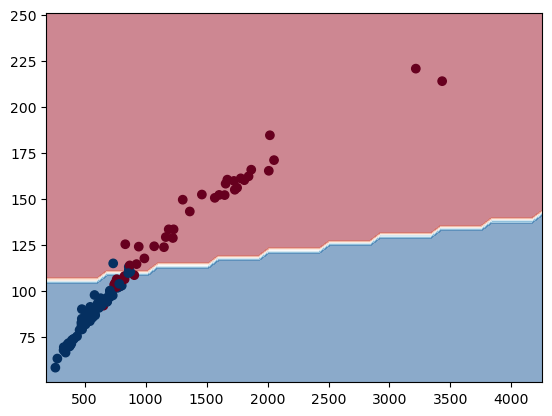

In [10]:
# setup your feature and observation vector for training
X_train=cancer_df[['worst area','worst perimeter']]
y_train=cancer_df['target']

# perform the classification based on the vectors you defined
pred_train, model = classification(X_train, y_train)

# the code for plotting the decision boundary is taken from the scikit-learn
# documentation under https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
# which is available under the BSD license (© 2007 - 2023, scikit-learn developers)

# generate two 2D features using numpy meshgrid
feature_1, feature_2 = np.meshgrid(
    np.linspace(cancer_df['worst area'].min(), cancer_df['worst area'].max()),
    np.linspace(cancer_df['worst perimeter'].min(), cancer_df['worst perimeter'].max())
    )
# create a grid based on the 2D features (see the online example)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

# generate the prediction for the grid and reshape it into 2D 
y_pred = np.reshape(model.predict(grid), feature_1.shape)

# created the decision boundary
display = DecisionBoundaryDisplay(
    xx0=feature_1, 
    xx1=feature_2, 
    response=y_pred,
    )

# set the colour map for your plot and display both the decision boundary, as well as the scatter plot of the
# actual features and their actual classes
cm = 'RdBu'
display.plot(cmap=cm,alpha=0.5)

display.ax_.scatter(x=cancer_df['worst area'][0:-1:5],
            y=cancer_df['worst perimeter'][0:-1:5],
            c=cancer_df['target'][0:-1:5],cmap=cm)
plt.show()

What do you observe? Comment on the quality of the prediction.

### Predicting metallicity

Finally, we want to apply logistic regression to a materials science dataset. Therefore, we will access the dataset based on the publication from [Zhuo et al., 2018](https://pubs.acs.org/doi/pdf/10.1021/acs.jpclett.8b00124)<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2) that can be accessed through __matminer__. Use the _load_dataset_ function to load the __matbench_expt_is_metal__ dataset - it will automatically be loaded as a pandas dataframe. Display the dataset.

You can get a more detailed step by step introduction of different features that we will explore in this section by looking at [this lesson](https://workshop.materialsproject.org/lessons/08_ml_matminer/matminer-notes/) of the materials project workshop.

In [11]:
df = mm.load_dataset("matbench_expt_is_metal")
df.head()

,composition,is_metal
0,Ag(AuS)2,True
1,Ag(W3Br7)2,True
2,Ag0.5Ge1Pb1.75S4,False
3,Ag0.5Ge1Pb1.75Se4,False
4,Ag2BBr,True


As you can see, the dataset contains the composition of each compoung and whether or not this is a metal. The latter information was determined based on the experimentally determined bandgap. You can get more information on the dataset by _printing_ the return of the function _get_all_dataset_info_, which takes the name of the dataset as input.

In [12]:
print(mm.get_all_dataset_info("matbench_expt_is_metal"))

Dataset: matbench_expt_is_metal
Description: Matbench v0.1 test dataset for classifying metallicity from composition alone. Retrieved from Zhuo et al. supplementary information. Deduplicated according to composition, ensuring no conflicting reports were entered for any compositions (i.e., no reported compositions were both metal and nonmetal). For benchmarking w/ nested cross validation, the order of the dataset must be identical to the retrieved data; refer to the Automatminer/Matbench publication for more details.
Columns:
	composition: Chemical formula.
	is_metal: Target variable. 1 if is a metal, 0 if nonmetal.
Num Entries: 4921
Reference: Y. Zhuo, A. Masouri Tehrani, J. Brgoch (2018) Predicting the Band Gaps of Inorganic Solids by Machine Learning J. Phys. Chem. Lett. 2018, 9, 7, 1668-1673 
 https//:doi.org/10.1021/acs.jpclett.8b00124.
Bibtex citations: ["@Article{Dunn2020,\nauthor={Dunn, Alexander\nand Wang, Qi\nand Ganose, Alex\nand Dopp, Daniel\nand Jain, Anubhav},\ntitle={Benc

As you can see, the composition given in the _composition_ column of the dataframe is a string. To use the composition as features, we ultimately want to create a number of feature vectors equal to the number of elements in the periodic table where for any observation of a certain compound, the entry to that feature vector contains the stochiometric fraction of said element. To visualize this, run the following cell. Comment on what operations have been performed here. Play around with the dataframe entry that is evaluated to see how the output changes. Discuss what you are seeing with the group.

In [13]:
# this code is partly taken and adapted from https://workshop.materialsproject.org/lessons/08_ml_matminer/matminer-notes/
# which is available under the BSD 3-Clause License, Copyright (c) 2019, shreddd, All rights reserved.
# For the list of conditions of the license, please see https://choosealicense.com/licenses/bsd-3-clause/

idx=4
form=df["composition"][idx]
print(form)
comp=Composition(df["composition"][idx])
print(comp)
ef=ElementFraction()
element_fraction_labels = ef.feature_labels()
print(element_fraction_labels)
compef=ef.featurize(comp)
print(compef)

Ag2BBr
Ag2 B1 Br1
['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
[0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


We now want to apply this operation to the whole dataset. To this end, we wish to use the _featurize_dataframe_ operation from _ElementFraction()_ but need to process our dataframe first to be able to do so.

In the first step, rename the column __composition__ into __formula__.

In [14]:
df=df.rename(columns={'composition':'formula'})
df.head()

,formula,is_metal
0,Ag(AuS)2,True
1,Ag(W3Br7)2,True
2,Ag0.5Ge1Pb1.75S4,False
3,Ag0.5Ge1Pb1.75Se4,False
4,Ag2BBr,True


Secondly, we need to convert the chemical formula to a composition, which can be done by using _StrToComposition_ and its _featurize_dataframe_ operation. Apply this to the dataframe and display it.

In [15]:
stc = StrToComposition()
df = stc.featurize_dataframe(df, "formula", pbar=False)
df.head()

,formula,is_metal,composition
0,Ag(AuS)2,True,"(Ag, Au, S)"
1,Ag(W3Br7)2,True,"(Ag, W, Br)"
2,Ag0.5Ge1Pb1.75S4,False,"(Ag, Ge, Pb, S)"
3,Ag0.5Ge1Pb1.75Se4,False,"(Ag, Ge, Pb, Se)"
4,Ag2BBr,True,"(Ag, B, Br)"


You can now apply the _featurize_dataframe_ operation from _ElementFraction()_ to the dataframe. However, this will take approximately 10 minutes. If you want to take a break, uncomment and run this cell.

In [16]:
#df = ef.featurize_dataframe(df, "composition", ignore_errors=True)
#df.to_pickle('./ismetal_df.pkl')

Otherwise, I have saved the final dataframe as .pkl for you to load at this stage.

In [17]:
load_df=pd.read_pickle('./ismetal_df.pkl')
load_df.head()

,formula,is_metal,composition,H,He,Li,Be,B,C,N,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,Ag(AuS)2,True,"(Ag, Au, S)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Ag(W3Br7)2,True,"(Ag, W, Br)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Ag0.5Ge1Pb1.75S4,False,"(Ag, Ge, Pb, S)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Ag0.5Ge1Pb1.75Se4,False,"(Ag, Ge, Pb, Se)",0.0,0,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Ag2BBr,True,"(Ag, B, Br)",0.0,0,0.0,0.0,0.25,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Assign the loaded dataframe to your original one and look at some scatter plots for some elements (displaying the element column in $x$ and the target value in $y$.

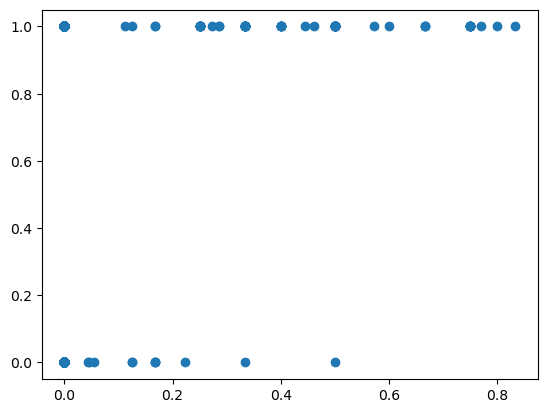

In [18]:
df=load_df
plt.scatter(x=df["Au"],y=df["is_metal"])

Finally, we are ready to perform our classification task. Assign the dataframe __without__ columns formula" "is_metal" and "composition" to your feature variable X and the "is_metal" column to the observation y. Then split this data into training and test data and train the classifier. Predict the classes for the testing data and calculate and display both the log loss error for training and testing data, as well as the accuracy score.

In [19]:
# assign the variables
X=df.drop(["formula","is_metal","composition"],axis=1)
y=df["is_metal"]

# split your data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# perform classification and prediction for training and testing data
pred_train, model = classification(X_train, y_train)
pred_train_proba = model.predict_proba(X_train)
pred_test_proba = model.predict_proba(X_test)
pred_test = model.predict(X_test)

# print log loss and accuracy for training and testing data
print("training log loss error: ", log_loss(y_train, pred_train_proba))
print("testing log loss error: ", log_loss(y_test, pred_test_proba))
print("training accuracy: ", accuracy_score(y_train, pred_train))
print("testing accuracy: ", accuracy_score(y_test, pred_test))

training log loss error:  0.3559908375002138
testing log loss error:  0.3630870517619849
training accuracy:  0.859465737514518
testing accuracy:  0.8639133378469871


What do these results mean? Discuss.

If you have time left, run the following cell and look up the function that are used in the _scikit_learn_ documentation. What operations are carried out and what does the final result mean?

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=30, random_state=1, shuffle=True)

lr = linear_model.LogisticRegression()
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=kfold)

print('Mean accuracy: {:.3f}'.format(np.mean(scores)))

Mean accuracy: 0.857


The kfold(...) method will divide our data into several smaller sets (folds). The model created can then be trained using cross-validation. This means the model is trained on a portion of the data and evaluated on the remaining portion. This process is repeated several times, with different combinations of training and testing data. The performance of the model is then measured for each iteration, and the cross-validation score is obtained by averaging these individual performance scores with the cross_val_score(...) method. It provides an estimate of how well the model is expected to perform on new, unseen data, indicating its ability to generalize beyond the training set.

<a name="cite_note-1"></a>1.[^](#cite_ref-1) Ward, L., Dunn, A., Faghaninia, A., Zimmermann, N. E. R., Bajaj, S., Wang, Q.,
Montoya, J. H., Chen, J., Bystrom, K., Dylla, M., Chard, K., Asta, M., Persson, K., Snyder, G. J., Foster, I., Jain, A., Matminer: An open source toolkit for materials data mining. Comput. Mater. Sci. 152, 60-69 (2018).

<a name="cite_note-2"></a>2.[^](#cite_ref-2) Y. Zhuo, A.M. Tehrani, and J. Brgoch, J. Phys. Chem. Lett. 2018, 9, 7, 1668–1673, https://doi.org/10.1021/acs.jpclett.8b00124